# **Cheminformatics in Python [PART 2.2] Predicting Solubility of Molecules using PyCaret | End-to-End Data Science Project** 

Chanin Nantasenamat

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will continue our journey into the world of Cheminformatics (i.e. lies at the interface of Informatics and Chemistry) by simplifying this notebook via the use of the low-code machine learning library PyCaret.


**Information from the previous notebook:**

We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

This idea for this notebook was inspired by the excellent blog post by Pat Walters$^2$ where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book ***Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More***.$^3$

## **1. Install PyCaret**

In [ ]:
! pip install pycaret

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 7.0MB 8.2MB/s 
     |████████████████████████████████| 266kB 44.1MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 3.3MB 40.7MB/s 
     |████████████████████████████████| 389kB 39.8MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 63.9MB 61kB/s 
     |████████████████████████████████| 1.6MB 37.6MB/s 
     |████████████████████████████████| 1.2MB 41.0MB/s 
     |████████████████████████████████| 133kB 41.1MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 6.4MB 38.0MB/s 
     |████████████████████████████████| 235kB 43.3MB/s 
     |████████████████████████████████| 552kB 37.1MB/s 
     |████████████████████████████████| 604kB 44.2MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
    

## **2. Read in dataset**

In [ ]:
import pandas as pd

In [ ]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)

In [ ]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **3. Model Building**

### **3.1. Model Setup**

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(data = dataset, target = 'logS', train_size=0.8, silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7903
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1144, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.518200,0.531300,0.725300,0.879300,0.206800,0.130500
1,Random Forest,0.526800,0.542400,0.731800,0.876800,0.206900,0.119400
2,CatBoost Regressor,0.543500,0.547200,0.735700,0.875900,0.210300,0.117100
3,Light Gradient Boosting Machine,0.563500,0.588700,0.762000,0.866900,0.218400,0.079700
4,Gradient Boosting Regressor,0.595800,0.617400,0.781700,0.859400,0.228300,0.059900
5,Extreme Gradient Boosting,0.597800,0.619900,0.783000,0.858800,0.228300,0.063700
6,AdaBoost Regressor,0.674300,0.764500,0.869500,0.826500,0.240100,0.137500
7,Decision Tree,0.648500,0.887700,0.938500,0.795800,0.251700,-0.054400
8,Linear Regression,0.764700,1.013900,1.001600,0.767000,0.289000,-0.212100
9,Ridge Regression,0.764800,1.013900,1.001600,0.767000,0.288900,-0.212700


### **3.3. Model Creation**

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5665,0.6118,0.7822,0.8764,0.1978,-0.1375
1,0.5183,0.5134,0.7165,0.8819,0.2300,-0.0383
2,0.4812,0.4912,0.7009,0.8895,0.2159,-0.1843
3,0.5150,0.4697,0.6853,0.9106,0.1997,-0.1160
4,0.3844,0.3017,0.5493,0.8974,0.1836,-0.1667
5,0.5429,0.6408,0.8005,0.8629,0.2002,0.7580
6,0.5052,0.4760,0.6899,0.8615,0.1939,-0.2687
7,0.5837,0.6279,0.7924,0.8807,0.2078,1.8027
8,0.5431,0.5835,0.7639,0.8752,0.2025,-0.0889
9,0.5418,0.5965,0.7723,0.8569,0.2368,-0.2551


### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [ ]:
tuned_et = tune_model('et', n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5543,0.5441,0.7376,0.8901,0.1807,-0.1316
1,0.5161,0.4614,0.6793,0.8939,0.2226,-0.1244
2,0.4941,0.5241,0.7239,0.8821,0.2313,-0.1848
3,0.4917,0.4173,0.6460,0.9206,0.1973,-0.0913
4,0.3921,0.2722,0.5217,0.9074,0.1681,-0.1948
5,0.5624,0.6388,0.7992,0.8633,0.1934,0.6988
6,0.4951,0.4216,0.6493,0.8773,0.1902,-0.2450
7,0.5966,0.6575,0.8108,0.8751,0.2082,1.8479
8,0.5320,0.5408,0.7354,0.8843,0.1966,-0.0753
9,0.5333,0.5837,0.7640,0.8599,0.2327,-0.2082


In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                    max_depth=40, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=280, n_jobs=None, oob_score=False,
                    random_state=7903, verbose=0, warm_start=False)


### **4. Model Analysis**

#### **4.1. Plot Models**
In this tutorial, we are performing regression and so further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

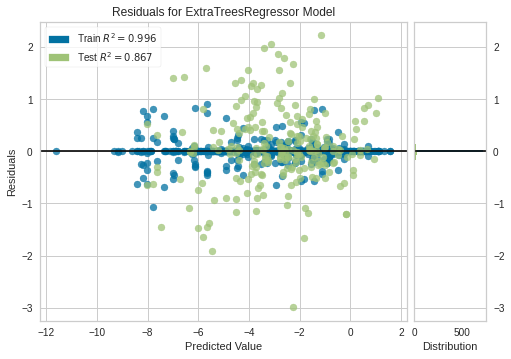

In [ ]:
plot_model(et, 'residuals')

**Prediction Error Plot**

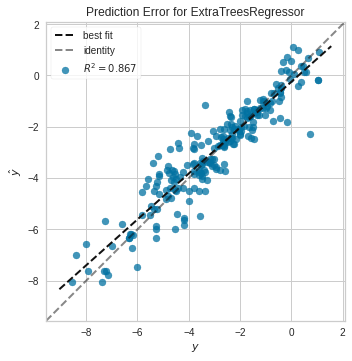

In [ ]:
plot_model(et, 'error')

**Cooks Distance Plot**

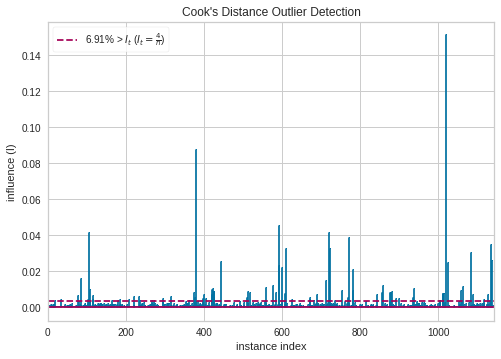

In [ ]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

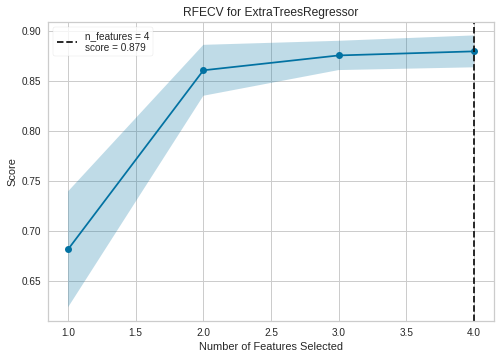

In [ ]:
plot_model(et, 'rfe')

**Learning Curve**

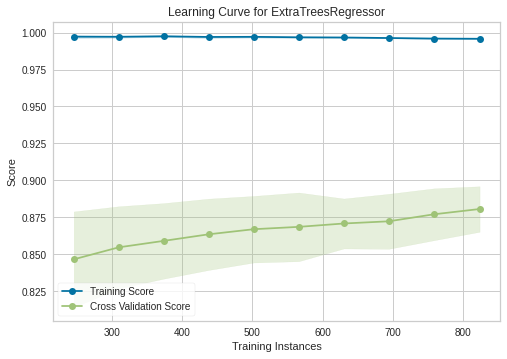

In [ ]:
plot_model(et, 'learning')

**Validation Curve**

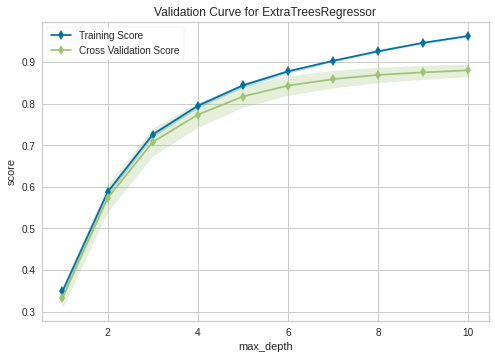

In [ ]:
plot_model(et, 'vc')

**Manifold Learning**

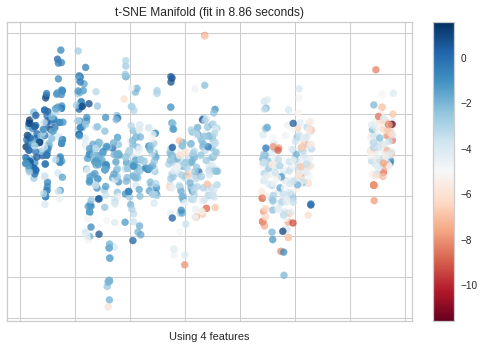

In [ ]:
plot_model(et, 'manifold')

**Feature Importance**

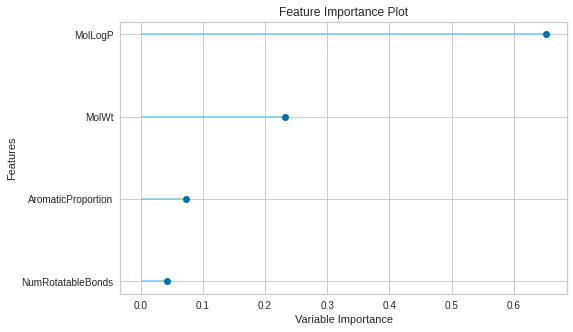

In [ ]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [ ]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


Here, the hyperparameter of the tuned model is displayed below.

In [ ]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
criterion,mae
max_depth,40
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

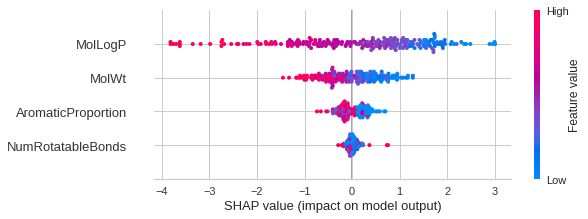

In [ ]:
interpret_model(et)

**Correlation Plot**

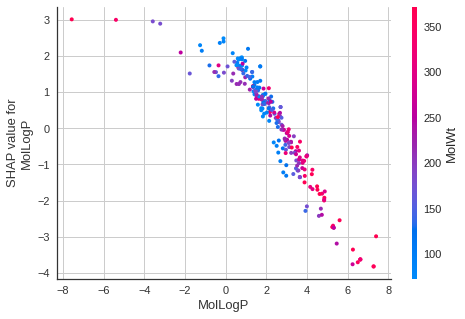

In [ ]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [ ]:
interpret_model(et, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [ ]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5274,0.5405,0.7352,0.8671,0.1973,-0.2672


In [ ]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,4.87188,293.414,4.0,0.545455,-5.47,-5.0870
1,2.59540,167.850,0.0,0.000000,-2.18,-1.9772
2,3.53712,162.276,0.0,0.500000,-5.23,-4.1647
3,1.34960,116.160,3.0,0.000000,-1.36,-1.3400
4,3.51410,215.362,3.0,0.000000,-3.40,-3.7009


---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.